In [1]:
import pandas as pd

dataset_dataframe = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
dataset_dataframe

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
dataset_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [3]:
dataset_dataframe.shape

(506, 14)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = dataset_dataframe.drop(['medv'], axis=1)
Y = pd.DataFrame(dataset_dataframe['medv'])

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))

In [5]:
type(X)

pandas.core.frame.DataFrame

In [6]:
type(Y)

pandas.core.frame.DataFrame

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression

linearRegressor = LinearRegression()
linearRegressor.fit(X_train,Y_train)

LinearRegression()

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y_pred = linearRegressor.predict(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
Mean Absolute Error (MAE): 3.19
R² Score: 0.67


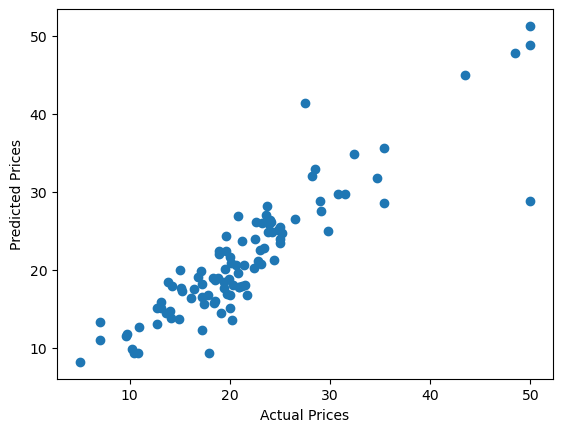

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.show()

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_train)

linearRegressorPoly = LinearRegression()
linearRegressorPoly.fit(X_poly, Y_train)

X_poly_test = poly.transform(X_test)

y_pred = linearRegressorPoly.predict(X_poly_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 14.25
Root Mean Squared Error (RMSE): 3.77
Mean Absolute Error (MAE): 2.57
R² Score: 0.81


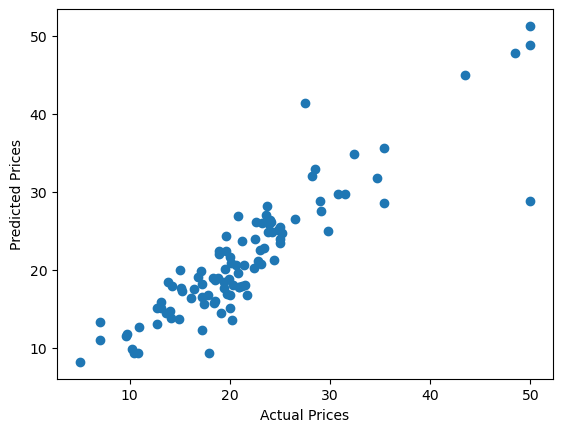

In [13]:
plt.scatter(Y_test, y_pred)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.show()

In [15]:
poly = PolynomialFeatures(degree=3)

X_poly = poly.fit_transform(X_train)

linearRegressorPoly = LinearRegression()
linearRegressorPoly.fit(X_poly, Y_train)

X_poly_test = poly.transform(X_test)

y_pred = linearRegressorPoly.predict(X_poly_test)

mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 7738.17
Root Mean Squared Error (RMSE): 87.97
Mean Absolute Error (MAE): 54.04
R² Score: -104.52


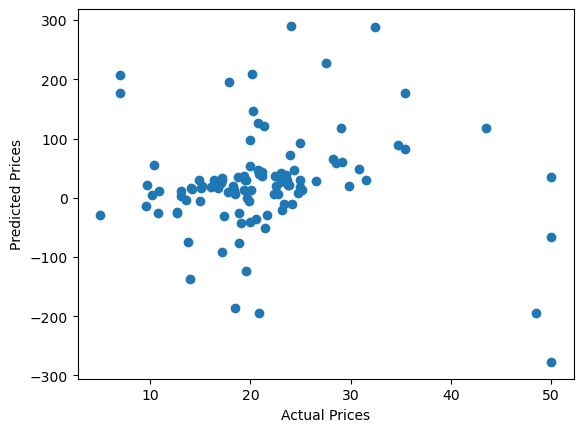

In [16]:
plt.scatter(Y_test, y_pred)

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")

plt.show()